In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Tensile Strength Example
#### Manual Solution (See code below for faster solution)
df(SSTR/SSB) = 4-1 = 3(Four different concentrations/samples)

df(SSE/SSW) = 4(6-1) = 20

df(SST) = 4*6 - 1 = 23 = 20 + 3

alpha = 0.01

{'whiskers': [<matplotlib.lines.Line2D at 0x2b444d95e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b444dae580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b444d95b20>,
 'medians': [<matplotlib.lines.Line2D at 0x2b444daec40>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b444daefa0>,
 'means': []}

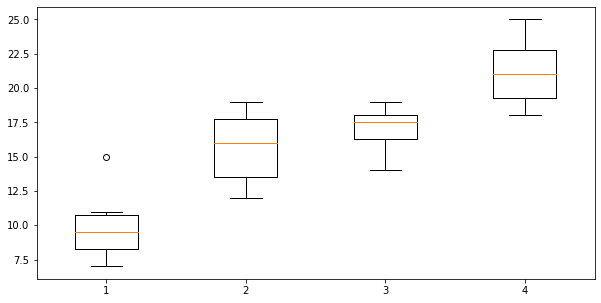

In [5]:
alpha = 0.01
five_percent = [7,8,15,11,9,10]
ten_percent = [12,17,13,18,19,15]
fifteen_percent = [14,18,19,17,16,18]
twenty_percent = [19,25,22,23,18,20]

fig,ax = plt.subplots(figsize = (10,5))
ax.boxplot([five_percent,ten_percent,fifteen_percent,twenty_percent])

In [6]:
data = np.array([five_percent,ten_percent,fifteen_percent,twenty_percent])
data

array([[ 7,  8, 15, 11,  9, 10],
       [12, 17, 13, 18, 19, 15],
       [14, 18, 19, 17, 16, 18],
       [19, 25, 22, 23, 18, 20]])

The problem with the above array is that the no. of columns is 6 but it should be equal to no. of samples i.e. 4

In [7]:
data = np.reshape(data,(6,4))
data

array([[ 7,  8, 15, 11],
       [ 9, 10, 12, 17],
       [13, 18, 19, 15],
       [14, 18, 19, 17],
       [16, 18, 19, 25],
       [22, 23, 18, 20]])

In [8]:
grand_mean = np.mean(data)
SSE,SST,SSTr = 0,0,0
df_treatment = 3
df_error = 20
# Calculate SSE - Iterate through all columns
for col_iter in range(data.shape[1]):
    # Fetch the next column
    col = data[:,col_iter]
    # Finding column mean
    col_mean = col.mean()
    # Sum of squares from mean
    for data_point in col:
        SSE += (data_point - col_mean) ** 2

# Calculate SST
for col_iter in range(data.shape[1]):
    for row_iter in range(data.shape[0]):
        data_point = data[row_iter][col_iter]
        SST += (data_point - grand_mean) ** 2 
SSTr = SST - SSE
MSE = SSE / 20
MSTr = SSTr / 3
f_value = MSTr / MSE

print(f'SST = {round(SST,3)}, SSTr = {round(SSTr,3)}, SSE = {round(SSE,3)}')
print(f'MSE = {round(MSE,3)}, MSTr = {round(MSTr,3)}')
print(f'F value = {round(f_value,3)}')

SST = 512.958, SSTr = 57.125, SSE = 455.833
MSE = 22.792, MSTr = 19.042
F value = 0.835


In [9]:
from scipy.stats import f,f_oneway

In [10]:
p_value = 1 - f.cdf(f_value,df_treatment,df_error)
# Check if f_value is correct
f.ppf(1 - p_value, dfn = 3, dfd = 20)

0.8354661791590484

In [11]:
# Testing using P-value method (One-tailed test)
if p_value <= alpha:
    print('Null hypothesis is rejected, thus hardwood concentration does affect tensile strength')
else:
    print('Null hypothesis is not rejected')

Null hypothesis is not rejected


In [12]:
# Testing using Critical value method (One-tailed test)
critical_value = f.ppf(1-alpha,dfn = 3, dfd = 20)
if f_value >= critical_value:
    print('Null hypothesis is rejected, thus hardwood concentration does affect tensile strength')
else:
    print('Null hypothesis is not rejected')

Null hypothesis is not rejected


### Faster solution using Python

In [13]:
f_oneway(five_percent,ten_percent,fifteen_percent,twenty_percent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [14]:
data = pd.read_excel('Week-5-Files/Tensile-strength-of-paper.xlsx')
data.columns = ['concentration5','concentration10','concentration15','concentration20']
data

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [15]:
data_new = pd.melt(data.reset_index(),id_vars = ['index'],value_vars = ['concentration5','concentration10','concentration15','concentration20'])
data_new

,index,variable,value
0,0,concentration5,7
1,1,concentration5,8
2,2,concentration5,15
3,3,concentration5,11
4,4,concentration5,9
5,5,concentration5,10
6,0,concentration10,12
7,1,concentration10,17
8,2,concentration10,13
9,3,concentration10,18


In [16]:
model = ols('value ~ C(variable)',data = data_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           3.59e-06
Time:                        13:20:41   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         15.6667      1.041     15.042      0.000      13.494      17.839
C(variable)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(variable)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(variable)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
anova_table = sm.stats.anova_lm(model,typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


Note: Residual row - SSW/SSE <br>
      C(variable) row - SSB/SSTr <br>
      PR - P-value

## Post - Hoc Analysis

### Least Significant Differences (LSD) Method

In [18]:
from scipy.stats import t

In [19]:
t_value = -t.ppf(0.025,20)
MSE = 6.50833
num_obs = 6
lsd = t_value *((2* MSE/num_obs) ** 0.5)
lsd

3.0724218802123273

In [20]:
# Calculate the mean of all concentrations
y1 = data['concentration5'].mean()
y2 = data['concentration10'].mean()
y3 = data['concentration15'].mean()
y4 = data['concentration20'].mean()

Compare the pairwise means with LSD to decide whether they can be considered equal or not. <br>

Ex - abs(y2 - y1) = 5.67 > 3.07 i.e. mu1 and mu2 are unequal.

Thus 5% and 10% hardwood concentrations produce different tensile strength of paper. This process is repeated for all pairwise means.

### Tukey - Kramer Test

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [23]:
mc = MultiComparison(data_new['value'],data_new['variable'])
mc

In [27]:
mcresult= mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.7827,-2.7894,5.4561,False
concentration10,concentration20,5.5,0.0066,1.3773,9.6227,True
concentration10,concentration5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration15,concentration20,4.1667,0.047,0.0439,8.2894,True
concentration15,concentration5,-7.0,0.001,-11.1227,-2.8773,True
concentration20,concentration5,-11.1667,0.001,-15.2894,-7.0439,True
